______________________________________________________________________
# Driver Drowsiness Detection using YOLO
___________________________________________________________________

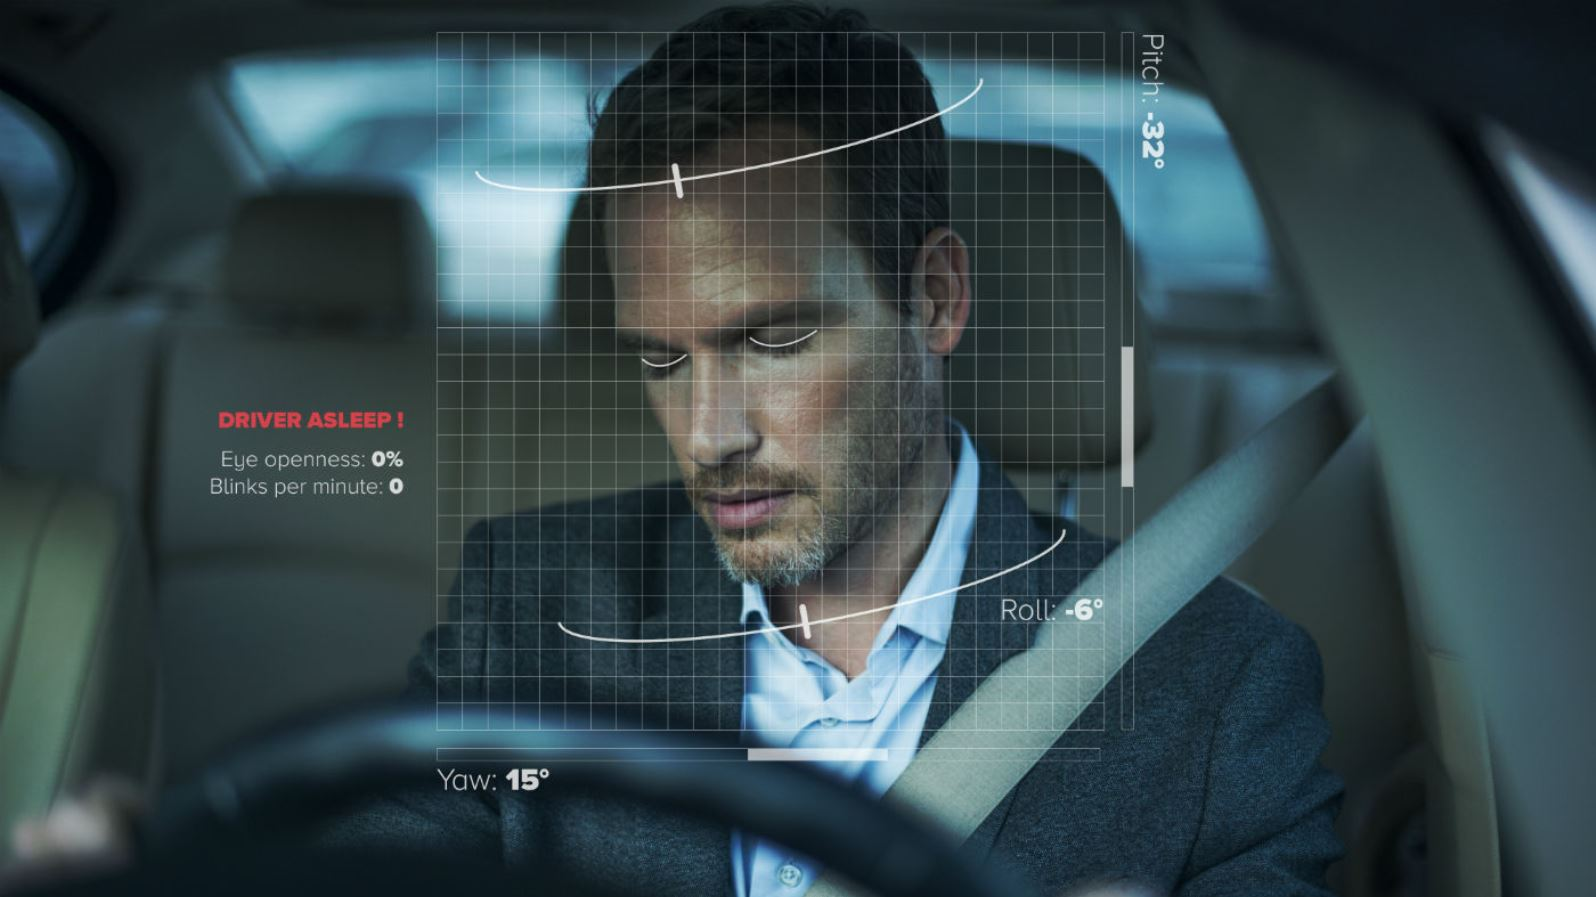

This project aims to detect driver drowsiness using YOLO (You Only Look Once) object detection framework. The model is trained to detect closed eyes, open eyes, yawns, and no yawns in images captured from the driver's camera.

____________________________________________________
### Download &  Import Necessary  Libraries
__________________________________________________

In [1]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Load the Train Images 

In [12]:
import os
import cv2

# Define the folder paths
dataset_folder = 'C:/Users/Admin/GL-DSEClass/ML_projects/driver drowsiness detection/dataset_new'
train_images_folder = os.path.join(dataset_folder, 'train')

def load_images_from_folder(folder_path):
    images = []
    labels = []
    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)
        if os.path.isdir(subfolder_path):
            for filename in os.listdir(subfolder_path):
                img = cv2.imread(os.path.join(subfolder_path, filename))
                if img is not None:
                    images.append(img)
                    labels.append(subfolder)  # Assuming the subfolder names are the labels
    return images, labels

# Print the folder paths to check if they are correct
print(f"Dataset folder path: {dataset_folder}")
print(f"Train images folder path: {train_images_folder}")

# Load train images and labels
train_images, train_labels = load_images_from_folder(train_images_folder)

# Print the number of train images and labels
print(len(train_images))
print(len(train_labels))


Dataset folder path: C:/Users/Admin/GL-DSEClass/ML_projects/driver drowsiness detection/dataset_new
Train images folder path: C:/Users/Admin/GL-DSEClass/ML_projects/driver drowsiness detection/dataset_new\train
2467
2467


In [13]:
train_images[1]

array([[[ 87, 108, 176],
        [ 89, 110, 178],
        [ 88, 107, 175],
        ...,
        [ 86, 110, 164],
        [ 81, 107, 161],
        [ 75, 101, 155]],

       [[ 82, 103, 171],
        [ 81, 102, 170],
        [ 82, 101, 169],
        ...,
        [ 83, 107, 161],
        [ 83, 109, 163],
        [ 80, 106, 160]],

       [[ 83, 105, 171],
        [ 80, 102, 168],
        [ 83, 102, 169],
        ...,
        [ 59,  83, 137],
        [ 66,  92, 146],
        [ 69,  95, 149]],

       ...,

       [[ 94, 139, 206],
        [ 94, 139, 206],
        [ 94, 139, 207],
        ...,
        [120, 154, 224],
        [120, 154, 224],
        [120, 154, 224]],

       [[ 94, 139, 206],
        [ 95, 140, 207],
        [ 95, 140, 208],
        ...,
        [120, 154, 224],
        [120, 154, 224],
        [119, 153, 223]],

       [[ 94, 139, 206],
        [ 95, 140, 207],
        [ 96, 141, 209],
        ...,
        [121, 155, 225],
        [119, 153, 223],
        [118, 152, 222]]

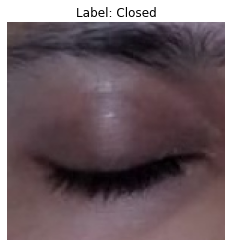

In [14]:
import cv2
import matplotlib.pyplot as plt

# Choose an index of the image you want to view
image_index = 0

# Load the image using cv2
image = train_images[image_index]

# Convert BGR image to RGB (since cv2 reads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(image_rgb)
plt.title(f"Label: {train_labels[image_index]}")
plt.axis('off')
plt.show()


### Load the Test Images 

In [15]:
import os
import cv2

# Define the folder paths
dataset_folder = 'C:/Users/Admin/GL-DSEClass/ML_projects/driver drowsiness detection/dataset_new'
test_images_folder = os.path.join(dataset_folder, 'test')

def load_images_from_folder(folder_path):
    images = []
    labels = []
    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)
        if os.path.isdir(subfolder_path):
            for filename in os.listdir(subfolder_path):
                img = cv2.imread(os.path.join(subfolder_path, filename))
                if img is not None:
                    images.append(img)
                    labels.append(subfolder)  # Assuming the subfolder names are the labels
    return images, labels

# Print the folder paths to check if they are correct
print(f"Dataset folder path: {dataset_folder}")
print(f"Train images folder path: {test_images_folder}")

# Load train images and labels
test_images, test_labels = load_images_from_folder(test_images_folder)

# Print the number of train images and labels
print(len(test_images))
print(len(test_labels))


Dataset folder path: C:/Users/Admin/GL-DSEClass/ML_projects/driver drowsiness detection/dataset_new
Train images folder path: C:/Users/Admin/GL-DSEClass/ML_projects/driver drowsiness detection/dataset_new\test
433
433


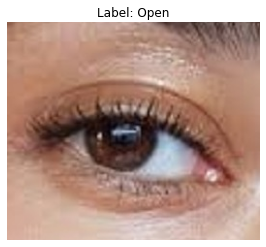

In [19]:
image = test_images[321]
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.title(f"Label: {test_labels[321]}")
plt.axis('off')
plt.show()


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import glob as gb
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score
import os

# Preparing data

For data, found 617 in folder Closed


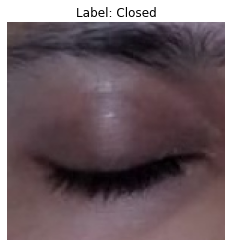

For data, found 616 in folder no_yawn


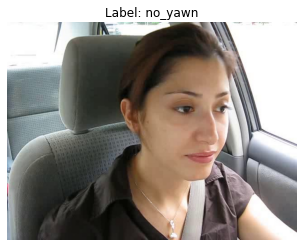

For data, found 617 in folder Open


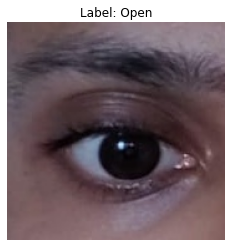

For data, found 617 in folder yawn


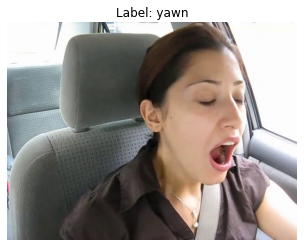

In [21]:
import cv2
import matplotlib.pyplot as plt
import os
import glob as gb

train_data = 'C:/Users/Admin/GL-DSEClass/ML_projects/driver drowsiness detection/dataset_new/train/'

for folder in os.listdir(train_data):
    files = gb.glob(pathname=str(train_data + folder + '/*.jpg'))
    print(f'For data, found {len(files)} in folder {folder}')

    # View one image from each folder
    if len(files) > 0:
        image_path = files[0]
        image = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        plt.imshow(image_rgb)
        plt.title(f"Label: {folder}")
        plt.axis('off')
        plt.show()


In [23]:
code = {'Closed':0, 'Open':1}
def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x

In [24]:
import os
import glob
import matplotlib.pyplot as plt

data_training = 'C:/Users/Admin/GL-DSEClass/ML_projects/driver drowsiness detection/dataset_new/train'
data_testing = 'C:/Users/Admin/GL-DSEClass/ML_projects/driver drowsiness detection/dataset_new/test'

# Function to load images from a folder
def load_images_from_folder(folder_path):
    images = []
    labels = []
    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)
        if os.path.isdir(subfolder_path) and subfolder in ['Closed', 'Open']:
            label = 0 if subfolder == 'Closed' else 1
            for filename in os.listdir(subfolder_path):
                img = plt.imread(os.path.join(subfolder_path, filename))
                if img is not None:
                    images.append(img)
                    labels.append(label)
    return images, labels

# Load train images and labels
train_images, train_labels = load_images_from_folder(data_training)

# Load test images and labels
test_images, test_labels = load_images_from_folder(data_testing)

# Print the count of images and labels
print(f'Number of train images: {len(train_images)}')
print(f'Number of train labels: {len(train_labels)}')
print(f'Number of test images: {len(test_images)}')
print(f'Number of test labels: {len(test_labels)}')


Number of train images: 1234
Number of train labels: 1234
Number of test images: 218
Number of test labels: 218


In [30]:
import os
import glob
import matplotlib.pyplot as plt
import pandas as pd

data_training = 'C:/Users/Admin/GL-DSEClass/ML_projects/driver drowsiness detection/dataset_new/train'

size = []
for folder in os.listdir(data_training):
    folder_path = os.path.join(data_training, folder)
    if folder in ['Closed', 'Open'] and os.path.isdir(folder_path):
        files = glob.glob(os.path.join(folder_path, '*.jpg'))
        for file in files: 
            image = plt.imread(file)
            size.append(image.shape)

# Convert the list of shapes to a Pandas Series
size_series = pd.Series(size)

# Count the occurrences of each unique shape
size_counts = size_series.value_counts()

print(size_counts)


(300, 300, 3)    14
(300, 342, 3)     8
(300, 370, 3)     6
(300, 314, 3)     6
(300, 304, 3)     6
                 ..
(335, 300, 3)     1
(344, 300, 3)     1
(370, 316, 3)     1
(359, 300, 3)     1
(446, 446, 3)     1
Length: 914, dtype: int64


In [31]:
s = 140
X_Train = []
y_Train = []
for folder in  os.listdir(data_training) : 
    if folder == 'Closed' or folder == 'Open':
        files = gb.glob(pathname= str( data_training + folder + '/*.jpg'))
        for file in files: 
            image = cv2.imread(file)
            image_array = cv2.resize(image , (s,s))
            X_Train.append(list(image_array))
            y_Train.append(code[folder])
    else:
        break

In [33]:
import os
import glob
import cv2

s = 140
X_Train = []
y_Train = []
for folder in os.listdir(data_training):
    if folder in ['Closed', 'Open']:
        folder_path = os.path.join(data_training, folder)
        files = glob.glob(os.path.join(folder_path, '*.jpg'))
        for file in files: 
            image = cv2.imread(file)
            image_array = cv2.resize(image, (s, s))
            X_Train.append(image_array)
            y_Train.append(code[folder])


In [34]:
print(f'we have {len(X_Train)} items in X_Train')
print(f'we have {len(y_Train)} items in Y_Train')

we have 1234 items in X_Train
we have 1234 items in Y_Train


### data test

In [36]:
data_test = 'C:/Users/Admin/GL-DSEClass/ML_projects/driver drowsiness detection/dataset_new/test'

size = []
for folder in os.listdir(data_training):
    folder_path = os.path.join(data_training, folder)
    if folder in ['Closed', 'Open'] and os.path.isdir(folder_path):
        files = glob.glob(os.path.join(folder_path, '*.jpg'))
        for file in files: 
            image = plt.imread(file)
            size.append(image.shape)

# Convert the list of shapes to a Pandas Series
size_series = pd.Series(size)

# Count the occurrences of each unique shape
size_counts = size_series.value_counts()

print(size_counts)


(300, 300, 3)    14
(300, 342, 3)     8
(300, 370, 3)     6
(300, 314, 3)     6
(300, 304, 3)     6
                 ..
(335, 300, 3)     1
(344, 300, 3)     1
(370, 316, 3)     1
(359, 300, 3)     1
(446, 446, 3)     1
Length: 914, dtype: int64


In [41]:
s = 140
X_test = []
y_test = []

test_folders = ['Closed', 'Open']

for folder in test_folders:
    folder_path = os.path.join(data_test, folder)
    files = gb.glob(pathname=os.path.join(folder_path, '*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image, (s, s))
        X_test.append(list(image_array))
        y_test.append(code[folder])


In [42]:
print(f'we have {len(X_test)} items in X_Test')
print(f'we have {len(y_test)} items in Y_Test')

we have 218 items in X_Test
we have 218 items in Y_Test


# Visualizing for some our data

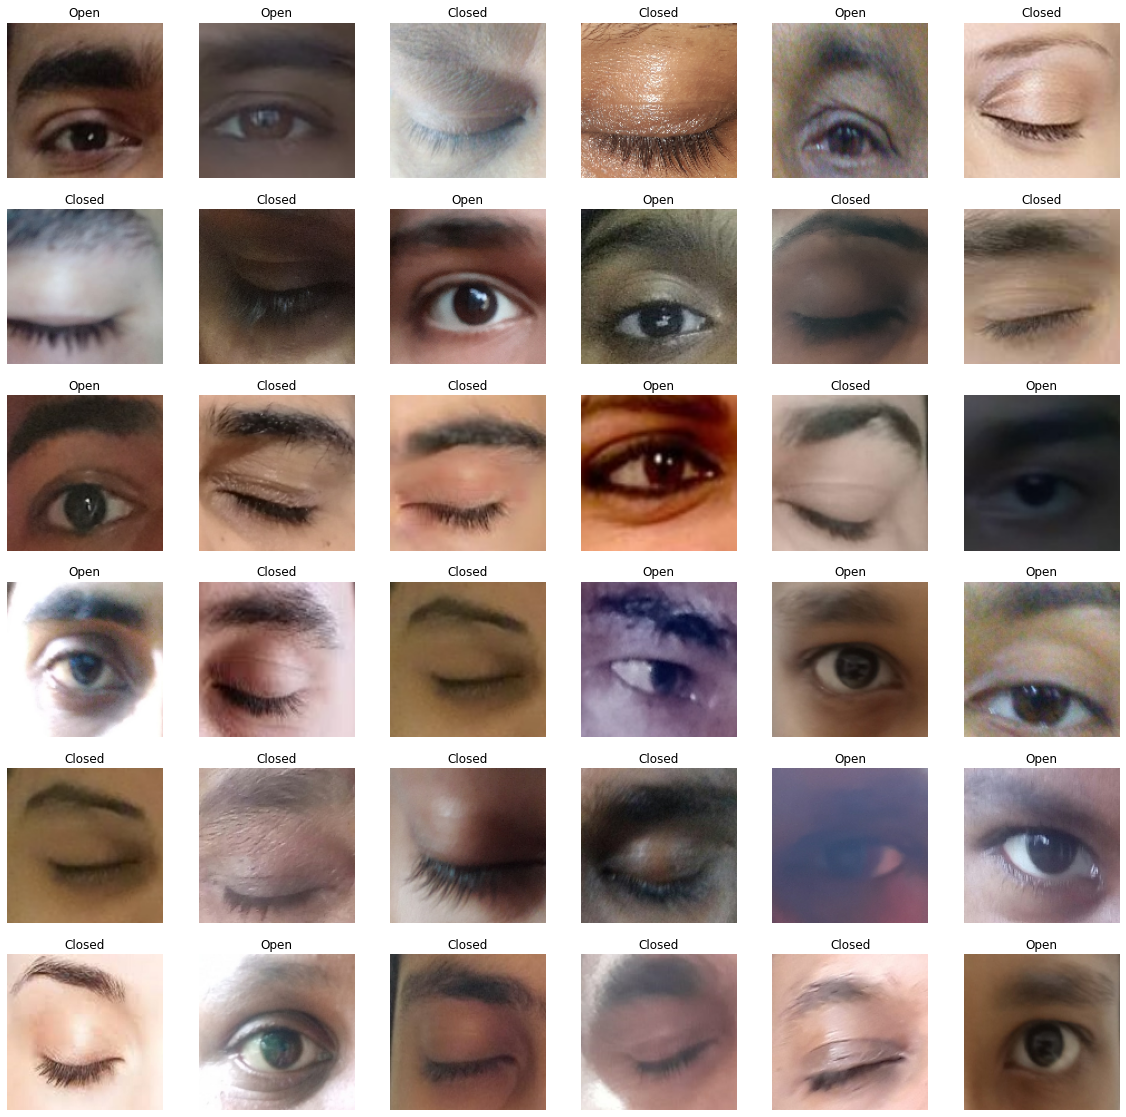

In [45]:
plt.figure(figsize=(20, 20))
for n, i in enumerate(list(np.random.randint(0, len(X_Train), 36))):
    plt.subplot(6, 6, n+1)
    # Convert BGR image to RGB
    image_rgb = cv2.cvtColor(X_Train[i], cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title(getcode(y_Train[i]))

plt.show()


# Splitting data for training and validation

In [46]:
X_train, X_val, y_train, y_val = train_test_split(X_Train, y_Train, train_size=0.8, shuffle=True, random_state=0)

X_train = np.array(X_train)
y_train = np.array(y_train)

X_val = np.array(X_val)
y_val = np.array(y_val)

temp2 = list(zip(X_test, y_test))
random.shuffle(temp2)
X_test, y_test = zip(*temp2)
X_test, y_test = np.array(X_test), np.array(y_test)

# Building our Model

In [47]:
model = Sequential([
        Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
        Conv2D(32,kernel_size=(3,3),activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(64,kernel_size=(5,5),activation='relu'),    
        Conv2D(64,kernel_size=(5,5),activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(128,kernel_size=(5,5),activation='relu'),
        Conv2D(128,kernel_size=(5,5),activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(256,kernel_size=(3,3),activation='relu'),
        Conv2D(256,kernel_size=(3,3),activation='relu'),
        Flatten() ,    
        Dense(512,activation='relu') ,    
        Dense(512,activation='relu') ,
        Dense(256,activation='relu') ,
        Dense(256,activation='relu') ,
        Dense(128,activation='relu') ,
        Dense(1,activation='sigmoid') ,    
        ])

In [48]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00008)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 138, 138, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 136, 136, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 68, 68, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        51264     
                                                                 
 conv2d_3 (Conv2D)           (None, 60, 60, 64)        102464    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

#### Using image generator for increasing our data

In [50]:
datagen = ImageDataGenerator(horizontal_flip=True, rotation_range=10, zoom_range=0.2, 
                             brightness_range=(0.1, 0.8))

##### Training model

In [51]:
epochs = 20
ThisModel = model.fit_generator(datagen.flow(X_train,y_train, batch_size=32), epochs=epochs,
                                     validation_data=(X_val,y_val), validation_steps=1, verbose=1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10676\2441493507.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  ThisModel = model.fit_generator(datagen.flow(X_train,y_train, batch_size=32), epochs=epochs,


Epoch 1/20
37/37 [==============================] - 132s 4s/step - loss: 0.4277 - accuracy: 0.8096 - val_loss: 0.2876 - val_accuracy: 0.9072
Epoch 2/20
37/37 [==============================] - 130s 4s/step - loss: 0.2700 - accuracy: 0.9173 - val_loss: 0.2215 - val_accuracy: 0.9416
Epoch 3/20
37/37 [==============================] - 131s 4s/step - loss: 0.2068 - accuracy: 0.9320 - val_loss: 0.1707 - val_accuracy: 0.9450
Epoch 4/20
37/37 [==============================] - 132s 4s/step - loss: 0.1530 - accuracy: 0.9475 - val_loss: 0.1373 - val_accuracy: 0.9588
Epoch 5/20
37/37 [==============================] - 132s 4s/step - loss: 0.1411 - accuracy: 0.9561 - val_loss: 0.1885 - val_accuracy: 0.9656
Epoch 6/20
37/37 [==============================] - 132s 4s/step - loss: 0.1154 - accuracy: 0.9621 - val_loss: 0.1001 - val_accuracy: 0.9725
Epoch 7/20
37/37 [==============================] - 133s 4s/step - loss: 0.0973 - accuracy: 0.9655 - val_loss: 0.0350 - val_accuracy: 0.9863
Epoch 8/20
37

##### Evaluate model

In [52]:
ModelLoss, ModelAccuracy = model.evaluate(X_test, y_test,batch_size=32)

print('Test Loss is {}'.format(ModelLoss))
6print('Test Accuracy is {}'.format(ModelAccuracy ))

7/7 [==============================] - 5s 670ms/step - loss: 0.0440 - accuracy: 0.9862
Test Loss is 0.04402618110179901
Test Accuracy is 0.9862385392189026


Based on the information provided, it seems that you have trained a model and evaluated its performance on a test dataset. The results indicate that the test loss is 0.0440 and the test accuracy is 0.9862.

The test loss is a measure of how well the model is performing in terms of the error between the predicted and actual values. A lower test loss indicates better performance, as it means that the model is able to make more accurate predictions.

The test accuracy represents the proportion of correctly classified samples in the test dataset. In this case, an accuracy of 0.9862 means that the model is able to correctly classify approximately 98.62% of the samples in the test dataset.

These results suggest that the trained model is performing well and achieving high accuracy on the test dataset. It indicates that the model has learned to make accurate predictions and generalize well to unseen data.

#### summarize model for accuracy and loss

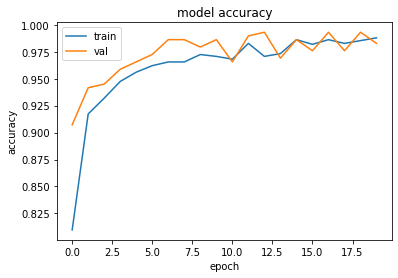

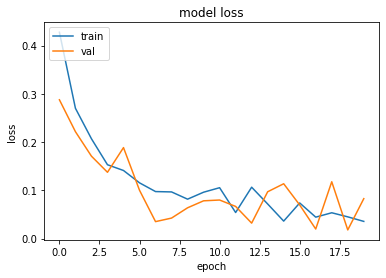

In [53]:
# summarize model for accuracy
plt.plot(ThisModel.history['accuracy'])
plt.plot(ThisModel.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize model for loss
plt.plot(ThisModel.history['loss'])
plt.plot(ThisModel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### Predict testing data

In [54]:
y_pred = model.predict(X_test)
pred = [1 * (x[0]>=0.5) for x in y_pred]
print('Prediction Shape is {}'.format(y_pred.shape))

7/7 [==============================] - 5s 625ms/step
Prediction Shape is (218, 1)


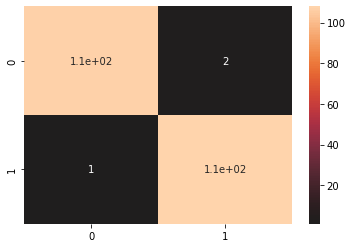

Confusion Matrix is
 [[107   2]
 [  1 108]]


In [56]:
CM = confusion_matrix(y_test, pred)

sns.heatmap(CM,annot=True, center=True)
plt.show()

print('Confusion Matrix is\n', CM)


In [57]:
print(classification_report(y_test, pred))
print(accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       109
           1       0.98      0.99      0.99       109

    accuracy                           0.99       218
   macro avg       0.99      0.99      0.99       218
weighted avg       0.99      0.99      0.99       218

0.9862385321100917


Overall, the classification report shows that the model has high precision, recall, and F1-score for both classes, indicating excellent performance in the binary classification task. The high accuracy further supports the model's effectiveness in making correct predictions.

#### Visualizing for some testing data

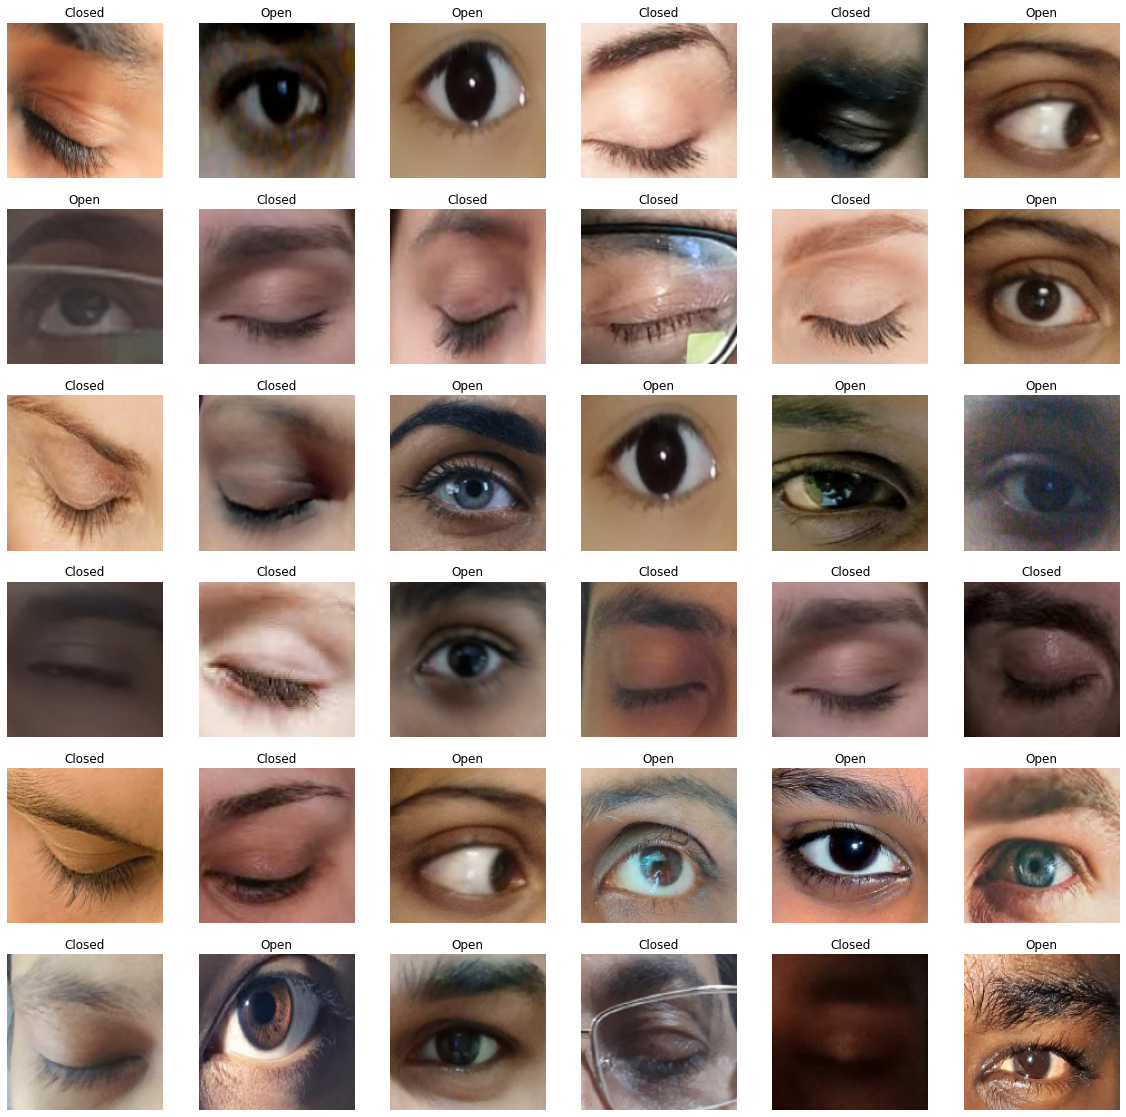

In [61]:
plt.figure(figsize=(20, 20))
for n, i in enumerate(list(np.random.randint(0, len(X_test), 36))):
    plt.subplot(6, 6, n+1)
    image_rgb = cv2.cvtColor(X_test[i], cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title(getcode(y_test[i]))

plt.show()


#### Saving our model

In [ ]:
model.save('driver_state.h5')